In [8]:
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
import statistics

random_grid = [
    [random.randint(0, 9) for t in range(0, 15)]
    for i in range(0, 11)]
for row in random_grid:
    print(row)

[0, 4, 5, 3, 4, 5, 0, 5, 0, 1, 6, 0, 5, 8, 3]
[4, 7, 9, 9, 2, 9, 6, 0, 0, 0, 7, 9, 7, 5, 6]
[9, 8, 1, 1, 4, 3, 7, 0, 2, 8, 4, 5, 7, 5, 2]
[3, 7, 0, 1, 0, 6, 7, 9, 5, 8, 7, 9, 3, 3, 5]
[1, 3, 7, 6, 9, 0, 0, 5, 7, 7, 8, 2, 9, 6, 3]
[9, 9, 1, 6, 5, 0, 7, 5, 6, 9, 3, 3, 9, 1, 9]
[2, 8, 0, 0, 2, 1, 0, 3, 7, 7, 5, 2, 1, 5, 8]
[9, 1, 1, 0, 7, 4, 4, 0, 4, 2, 0, 9, 3, 2, 7]
[1, 3, 9, 3, 8, 0, 1, 0, 0, 9, 5, 7, 9, 3, 4]
[6, 5, 8, 8, 2, 8, 6, 6, 5, 1, 9, 8, 3, 6, 4]
[9, 0, 7, 9, 3, 5, 1, 9, 1, 1, 9, 0, 4, 6, 5]


In [9]:
# Task 1 Question 1 Solution

In [10]:
def isValidMove(i, j, m, n):
    if (i > m-1 or j > n-1):
        return False
    return True

# Function that returns all adjacent elements
def getAdjacent(i, j, m, n):
# Initialising a vector array
    v1 = 99
    v2 = 99
    # Checking for all the possible adjacent positions
    if (isValidMove(i + 1, j, m, n)):
        v1=(mat[i + 1][j])
    if (isValidMove(i, j + 1, m, n)):
        v2=(mat[i][j + 1])

    # Returning the vector
    return v1, v2

def moveDecider(i, j, m, n):
    if (i > d[0] or j > d[1]):
        return
    path.append((i,j))
    values.append(mat[i][j])
    
    v1, v2 = getAdjacent(i, j, m, n)
    if v1 <= v2 :
        moveDecider(i+1, j, m, n)
    if v1 > v2:
        moveDecider(i, j+1, m, n)
    return
    
def calsum(l):
    # returning sum of list using List comprehension
    return  sum([int(i) for i in l if type(i)== int or i.isdigit()])     

# Driver Code
if __name__ == "__main__":
  mat = random_grid
  # Size of given 2d array
  m = len(mat)
  n = len(mat[0])
  # print(m, n)
  s = [0, 0]
  d = [m-1, n-1]
  path = []
  values = []
  moveDecider(s[0], s[1], len(mat), len(mat[0]))
  print(path)
  print(values)
  print(calsum(values))


[(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (7, 7), (8, 7), (8, 8), (9, 8), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14)]
[0, 4, 7, 8, 1, 0, 1, 0, 6, 0, 0, 1, 0, 3, 0, 0, 0, 5, 1, 1, 9, 0, 4, 6, 5]
62


In [11]:
# Task 1 Question 2 Solution: Implementing Djikstra (using a simple priority queue)

In [12]:
import random
from heapq import heappush, heappop # Importing Priority Queue using heap module

def shortestPathfinder(grid):
	h = [] # initialise empty priority queue
	startNode = (grid[0][0], (0,0)) # starting node : time cost, coordinates of a node
	heappush(h, startNode) # initialise priority queue with pushing startNode
	directions = [(1,0), (0,1), (-1,0), (0,-1) ] # 4-way directions since diagonal moves not allowed
	costsVisited = {(0,0): grid[0][0]} # stores min time costs to get to all nodes
	moveFrom = {(0,0): None} # stores to source of moves to directions
	while h:
		cost, node = heappop(h) # getting time cost, node coordinates from queue
		x, y = node # coordinates of a node
		if x == len(grid)-1 and y == len(grid[0])-1: # destination found
			break

		# exploring nextNode
		for dir in directions:
			nextX, nextY = x+dir[0], y+dir[1] # next nodes coordinates to check
			# check boundaries
			if 0 <= nextX <= len(grid)-1 and 0 <= nextY <= len(grid[0])-1:
				nextNodeCost, nextNode = grid[nextX][nextY], (nextX, nextY) # exploring next node's time cost
				newCost = cost + nextNodeCost # calculating move's total cost
				# check if time costs needs to be updated
				if ( nextNode not in costsVisited or (nextNode in costsVisited and costsVisited[nextNode] > newCost) ):
					costsVisited[nextNode] = newCost # storing next node and its time cost to visited nodes list
					heappush(h, (newCost, nextNode)) # updating queue
					moveFrom[nextNode] = node # updating source node of a move

	# Shortest path:
	path = [] # path
	targetNode = (len(grid)-1, len(grid[0])-1) # target node
	while targetNode in moveFrom:
		path.insert(0, targetNode)
		targetNode = moveFrom[targetNode]
    
	#print("total cost = ", costsVisited[(x,y)]) # prints total time cost to reach destination
	return path, costsVisited[(x,y)]

# Driver Code
if __name__ == "__main__":
    # cellDistribution = random.randint(0, 9) # find another way to define distributions
    sizeGrid = [11, 15]
    random_grid = [[random.randint(0, 9) for t in range(0, sizeGrid[1])]
        for i in range(0, sizeGrid[0])] # initialise a grid
    #for row in random_grid:
        #print(row)
    shortestPath = shortestPathfinder(random_grid)
    print("shortest path = ", shortestPath[0], "total cost = ", shortestPath[1])


shortest path =  [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 14), (10, 14)] total cost =  61


In [6]:
# Task 1 Question 3 Solution:

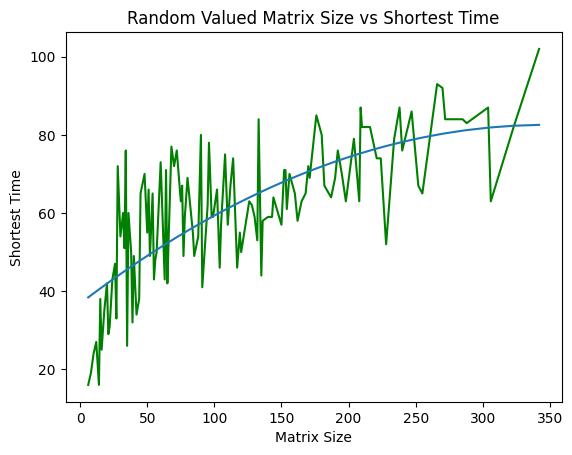

standard deviation :  17.62000326951876


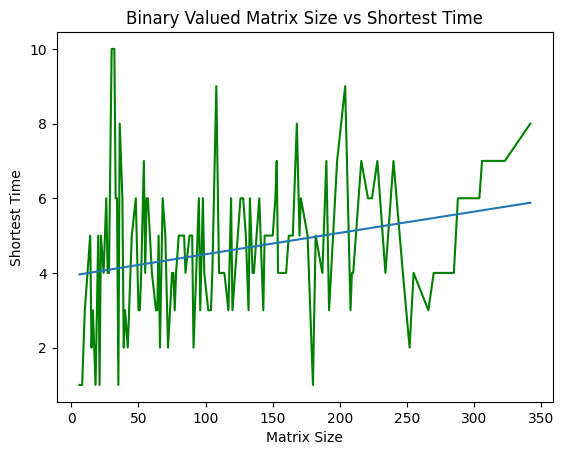

standard deviation :  1.8606567767822755


In [7]:
# Statistical analysis
# initialize numbers lists
lst = list(range(2, 20))

# simulating permutations of the list in
# a group of 2
pair_list = list(itertools.combinations(lst,2)) # get combinations of possible rows and columns
matrixSize = []
time = []
time_binary = []
for size in pair_list:
    totalNodes = size[0]*size[1] # calculate matrix size for each combination
    if totalNodes not in matrixSize:
        matrixSize.append(totalNodes)
    else:
        continue
    random_grid = [[random.randint(0, 9) for t in range(0, size[1])]
                        for i in range(0, size[0])] # initialise a grid
    binary_grid = [[random.randint(0, 1) for t in range(0, size[1])]
                        for i in range(0, size[0])] # initialise a grid
    shortestTime = shortestPathfinder(random_grid)[1] # calculate shortest path's time
    shortestTime_binary = shortestPathfinder(binary_grid)[1]
    time.append(shortestTime)
    time_binary.append(shortestTime_binary)

zipped = list(zip(matrixSize, time))
zipped_binary = list(zip(matrixSize, time_binary))
# Using sorted and lambda to sort according to matrix size
listSizeTime = sorted(zipped, key = lambda x: x[0])
listSizeTime_binary = sorted(zipped_binary, key = lambda x: x[0])
lx = [x for x,y in listSizeTime]
ly = [y for x,y in listSizeTime]
lx_binary = [x for x,y in listSizeTime_binary]
ly_binary = [y for x,y in listSizeTime_binary]
# plotting
plt.title("Random Valued Matrix Size vs Shortest Time")
plt.xlabel("Matrix Size")
plt.ylabel("Shortest Time")
plt.plot(lx, ly, color ="green")
#calculate equation for quadratic trendline
z = np.polyfit(lx, ly, 2)
p = np.poly1d(z)
#add trendline to plot
plt.plot(lx, p(lx))
plt.show()
print("standard deviation : ", statistics.pstdev(ly))

plt.title("Binary Valued Matrix Size vs Shortest Time")
plt.xlabel("Matrix Size")
plt.ylabel("Shortest Time")
plt.plot(lx_binary, ly_binary, color ="green")

#calculate equation for quadratic trendline
z = np.polyfit(lx_binary, ly_binary, 2)
p = np.poly1d(z)
#add trendline to plot
plt.plot(lx_binary, p(lx_binary))
plt.show()
print("standard deviation : ", statistics.pstdev(ly_binary))